# Data Acquisition and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask 
import seaborn as sns

In [2]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../globalterrorismdb_0718dist.csv',encoding='latin-1')
df.head()

C:\Users\youse\AppData\Local\Temp\ipykernel_16216\1865913958.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../globalterrorismdb_0718dist.csv',encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [5]:
df.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [6]:
# min number choosen randomly after many trials from data above
df2 = df.dropna(axis=1,thresh=152680)

In [7]:
df2.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               638
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
nkill       

In [8]:
# Coulmns choosen to work on and make analysis
df2 = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'attacktype1_txt', 'targtype1_txt',
       'gname', 'weaptype1_txt', 'nkill', 'nwound',"motive"]]

In [9]:
df2.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN


In [10]:
df2.shape

(181691, 14)

In [11]:
df2.isna().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  435
attacktype1_txt         0
targtype1_txt           0
gname                   0
weaptype1_txt           0
nkill               10313
nwound              16311
motive             131130
dtype: int64

In [12]:
# filling na values in kills coulmn and nwound by medina


df2["nkill"].fillna(round(df2["nkill"].median()),inplace=True)
df2["nwound"].fillna(round(df2["nwound"].median()),inplace=True)


C:\Users\youse\AppData\Local\Temp\ipykernel_16216\3106323916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["nkill"].fillna(round(df2["nkill"].median()),inplace=True)
C:\Users\youse\AppData\Local\Temp\ipykernel_16216\3106323916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["nwound"].fillna(round(df2["nwound"].median()),inplace=True)


In [13]:
# filling na values in string coulmns with Unkonwn

value = str(df2["motive"].mode()).split()[1]
df2["motive"].fillna(value,inplace=True)
df2["provstate"].fillna(value,inplace=True)
df2["city"].fillna(value,inplace=True)

C:\Users\youse\AppData\Local\Temp\ipykernel_16216\874183174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["motive"].fillna(value,inplace=True)
C:\Users\youse\AppData\Local\Temp\ipykernel_16216\874183174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["provstate"].fillna(value,inplace=True)
C:\Users\youse\AppData\Local\Temp\ipykernel_16216\874183174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["city"].fillna

In [14]:
df2.shape

(181691, 14)

In [15]:
df2.to_csv("final_data2.csv",index=0)

In [16]:
len(df2.columns)

14

In [17]:
df2.isna().sum()

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
provstate          0
city               0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
motive             0
dtype: int64

----------------------------------

# Data Analysis

Using numpy

In [18]:
df2.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
provstate           object
city                object
attacktype1_txt     object
targtype1_txt       object
gname               object
weaptype1_txt       object
nkill              float64
nwound             float64
motive              object
dtype: object

In [19]:
types = ["float64","int64"]

In [20]:
print("The mean of numeric values",np.mean(df2.select_dtypes(include=types)))
print("The median of numeric values",np.median(df2.select_dtypes(include=types)))
print("The std of numeric values:\n",np.std(df2.select_dtypes(include=types)))

The mean of numeric values 405.9524148141625
The median of numeric values 6.0
The std of numeric values:
 iyear     13.259394
imonth     3.388294
iday       8.814020
nkill     11.227026
nwound    34.309653
dtype: float64


In [21]:
# Function to identify the most frequent value in a column
def most_frequent_value(column):
    column = column.astype(str)
    values, counts = np.unique(column, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

In [22]:
# Iterate over each categorical column and find the most frequent value

most_frequent_values = {}
for column in df2.select_dtypes(include=['object']).columns:
    most_frequent_values[column] = most_frequent_value(df2[column])

# Display the most frequent values for each categorical column
most_frequent_values

{'country_txt': 'Iraq',
 'region_txt': 'Middle East & North Africa',
 'provstate': 'Baghdad',
 'city': 'Unknown',
 'attacktype1_txt': 'Bombing/Explosion',
 'targtype1_txt': 'Private Citizens & Property',
 'gname': 'Unknown',
 'weaptype1_txt': 'Explosives',
 'motive': 'Unknown'}

------------------------

Using pandas

In [23]:
#Weapon type used and count of every attack type
df3 = df2[df2["weaptype1_txt"] != "Unknown"]

weapon_in_attack = df3[["weaptype1_txt",]]\
    .groupby(["weaptype1_txt"]).agg(
        count_of_weapon_used = pd.NamedAgg(column="weaptype1_txt", aggfunc = 'count')
    ).sort_values("count_of_weapon_used",ascending=False)
weapon_in_attack.head(10)

,count_of_weapon_used
weaptype1_txt,
Explosives,92426
Firearms,58524
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


In [39]:
# Attacks per year
Attacks_per_year = df2.groupby("iyear").agg(
    Attacks_Per_year = pd.NamedAgg(column='attacktype1_txt', aggfunc='count'),
    
).sort_values("Attacks_Per_year",ascending=False)
Attacks_per_year.head(15)

,Attacks_Per_year
iyear,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826


In [25]:
# kills per year

kills_per_year = df2.groupby("iyear").agg(
    kills_per_year = pd.NamedAgg(column='nkill', aggfunc='sum'),
    
).sort_values("kills_per_year",ascending=False)
kills_per_year.head(15)

,kills_per_year
iyear,
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0
2013,22273.0
2012,15497.0
2007,12824.0
1997,10924.0
1984,10450.0


In [26]:
# Wounded per year

wounded_per_year = df2.groupby("iyear").agg(
    wounded_per_year = pd.NamedAgg(column='nwound', aggfunc='sum'),
    
).sort_values("wounded_per_year",ascending=False)
wounded_per_year.head(15)

,wounded_per_year
iyear,
2015,44043.0
2014,41128.0
2016,40001.0
2013,37688.0
2012,25445.0
2017,24927.0
2001,22774.0
2007,22524.0
2009,19138.0


In [27]:
# cities with most attacks

affected_cities = df2.groupby(["city", ])\
    .agg(
        attack_per_city = pd.NamedAgg(column="city",aggfunc="count"),

    ).sort_values("attack_per_city",ascending=False).reset_index()

affected_cities = affected_cities[affected_cities["city"] != "Unknown"]
affected_cities.head(15)


,city,attack_per_city
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048
10,Athens,1019


In [28]:
# Regions  with most attacks

affected_regions = df2[["region_txt", ]].groupby(["region_txt" ])\
    .agg(
        attack_per_region = pd.NamedAgg(column="region_txt",aggfunc="count"),

    ).sort_values("attack_per_region",ascending=False).reset_index()

affected_regions


,region_txt,attack_per_region
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


In [29]:
# affected_countries  with most attacks

affected_countries = df2[["country_txt", ]].groupby(["country_txt" ])\
    .agg(
        attack_per_country = pd.NamedAgg(column="country_txt",aggfunc="count"),

    ).sort_values("attack_per_country",ascending=False).reset_index()

affected_countries.head(15)


,country_txt,attack_per_country
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [30]:
# Group with most attacks

Group_with_most_attacks = df2.groupby(["gname"]).agg(
    Group_with_most_attacks = pd.NamedAgg(column="gname",aggfunc="count")
).sort_values("Group_with_most_attacks",ascending=False).reset_index()

Group_with_most_attacks = Group_with_most_attacks[Group_with_most_attacks["gname"] != "Unknown"]

Group_with_most_attacks.head(15)

,gname,Group_with_most_attacks
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418
10,Kurdistan Workers' Party (PKK),2310


In [31]:
#the most common attack types 

attack_types_targets = df2[["attacktype1_txt",]].groupby(["attacktype1_txt"]).agg(
    attack_types_count = pd.NamedAgg(column="attacktype1_txt",aggfunc="count")
).sort_values("attack_types_count",ascending=False)

attack_types_targets.head(15)


,attack_types_count
attacktype1_txt,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [32]:
#the most common targets 

attack_types_targets = df2[["targtype1_txt"]].groupby(["targtype1_txt"]).agg(
    Most_target_affected = pd.NamedAgg(column="targtype1_txt",aggfunc="count")
).sort_values("Most_target_affected",ascending=False)

attack_types_targets.head(10)


,Most_target_affected
targtype1_txt,
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5898
Religious Figures/Institutions,4440


-----------------------------------------

# Data Visualization

In [33]:
attacks_per_year = df2[["iyear","attacktype1_txt"]].groupby("iyear").agg(
    Attacks_per_year = pd.NamedAgg(column="attacktype1_txt",aggfunc="count")
).reset_index()

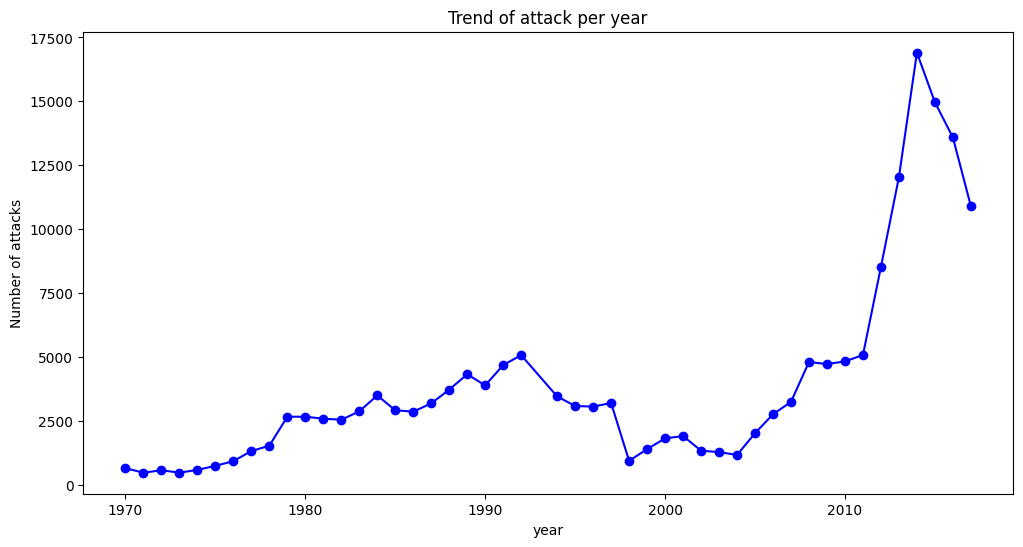

In [34]:
#
plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year["iyear"],attacks_per_year["Attacks_per_year"], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Trend of attack per year')
plt.ylabel('Number of attacks')
plt.xlabel('year')

# Show the plot
plt.show()

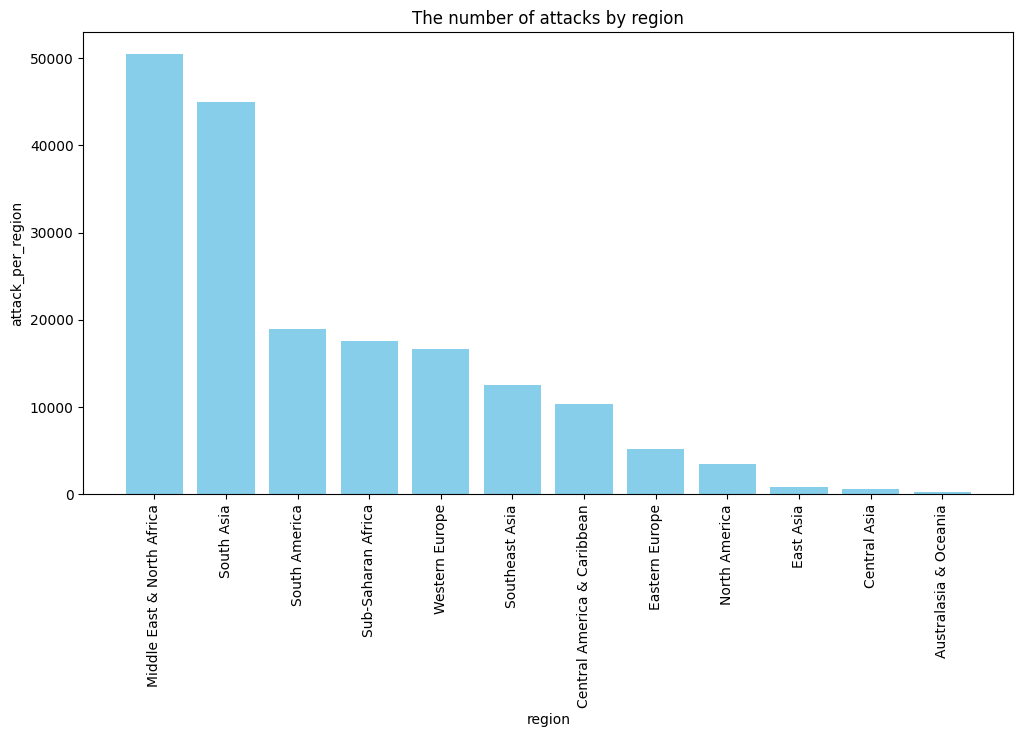

In [35]:
#Bar plot of the number of attacks by region
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(affected_regions["region_txt"], affected_regions["attack_per_region"], color='skyblue')

# Add titles and labels
plt.xticks(rotation=90)
plt.title('The number of attacks by region')
plt.xlabel('region')
plt.ylabel('attack_per_region')

# Show the plot
plt.show()

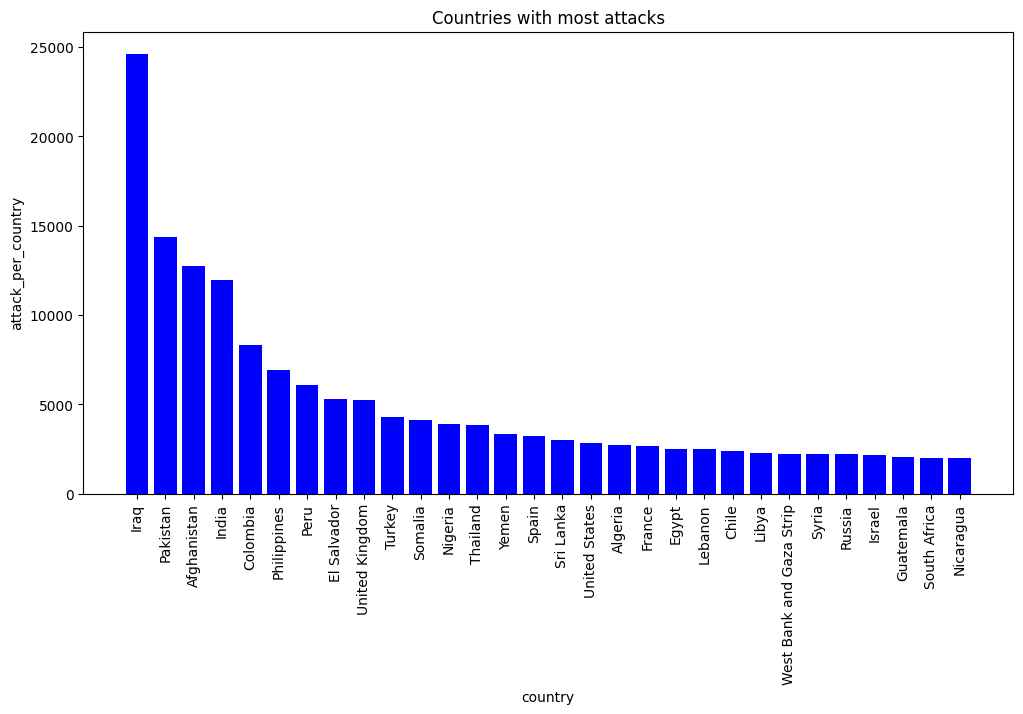

In [36]:
plt.figure(figsize=(12, 6))  # width, height in inches

# Create a bar plot with different colors
bars = plt.bar(affected_countries["country_txt"][:30], affected_countries["attack_per_country"][:30], color='blue')

# Add titles and labels
plt.title('Countries with most attacks')
plt.xlabel('country')
plt.ylabel('attack_per_country')
plt.xticks(rotation=90)



# Show the plot
plt.show()


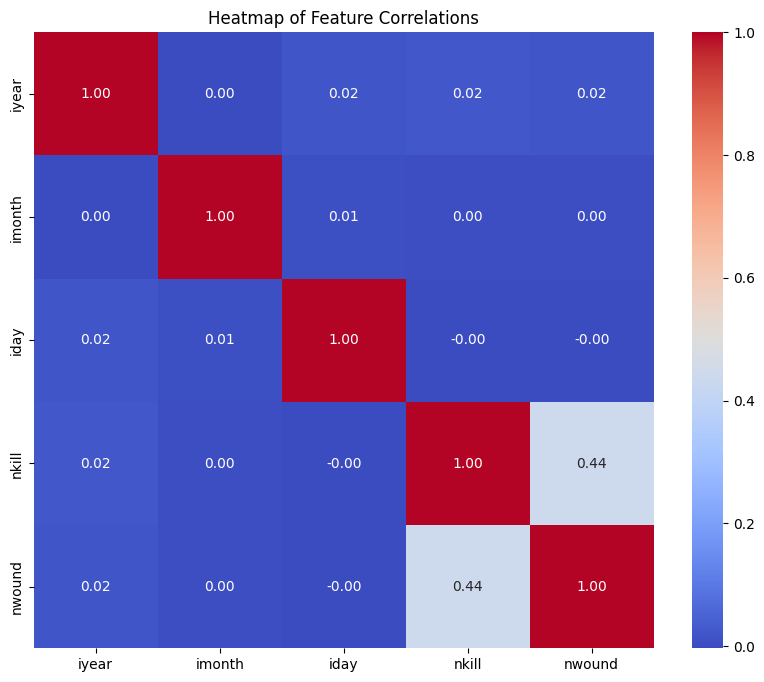

In [37]:
# Heatmap for the numeric attributes in data frame
corr_matrix = df2.select_dtypes(include=[np.number]).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
plt.title('Heatmap of Feature Correlations')
plt.show()

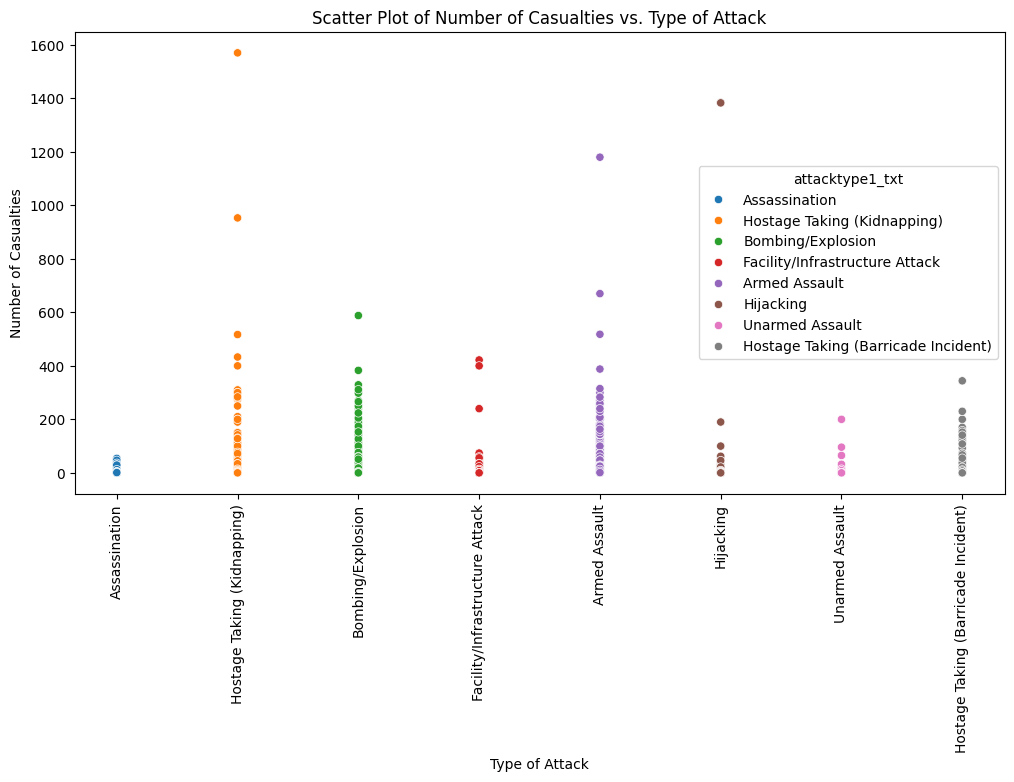

In [38]:
#Scatter plot showing the relationship between the number of casualties and the type of attack
df3 = df2[df2["attacktype1_txt"] != "Unknown"]
plt.figure(figsize=(12, 6))  # width, height in inches

# Create a scatter plot
sns.scatterplot(x="attacktype1_txt", y='nkill', data=df3, hue='attacktype1_txt',)

# Add titles and labels
plt.title('Scatter Plot of Number of Casualties vs. Type of Attack')
plt.xlabel('Type of Attack')
plt.xticks(rotation=90)
plt.ylabel('Number of Casualties')

# Show the plot
plt.show()